In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('OnlineRetail.csv',encoding='ISO-8859-1')

In [431]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [280]:
sample=df.head(1000)

In [281]:
sample.to_csv('sample.csv', index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [432]:
# Finding the percentage of null values

df.isna().sum().sort_values(ascending=False).head(5)/len(df)*100

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
dtype: float64

In [22]:
# Since we are analysing the purchasing nature of all the customers, 
# we are dropping the rows in which 'CustomerID' value is null & description null values

df1=df.dropna()

In [23]:
# customerID is a categorical column. Converting it to string

df1['CustomerID']=df1['CustomerID'].astype(int)
df1['CustomerID']=df1['CustomerID'].astype(str)

In [24]:
df1[df1['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom


In [315]:
df1[df1['Quantity']<0].tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,12/9/2011 11:58,1.25,17315,United Kingdom


In [25]:
# When any material is purchased, quantity can't be negative

print('Number of negative quantity variable is:',df1[df1['Quantity']<0].shape[0])

Number of negative quantity variable is: 8905


### The number of -ve quantity entries is 8905
### It means it was not actually taken by the customer and amount not spent on this by the customer
### It is due to the discount, misc manual entry made by the employee and return of the product from the customer due to various reasons

In [28]:
# Filtering this -ve entries

df2=df1[df1['Quantity']>0]

In [16]:
df2.shape

(397924, 8)

### Finding the total amount spent by multiplying Quantity and UnitPrice values

In [29]:
df2['Total_amount_spent']=df2['Quantity']*df2['UnitPrice']

In [30]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00


In [268]:
# Grouping CustomerID and summing the amount spent

cust_df=pd.DataFrame(df2.groupby('CustomerID')['Total_amount_spent'].sum())
cust_df.reset_index(inplace=True)
cust_df.head()

,CustomerID,Total_amount_spent
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [32]:
# New variable - Number of items purchased by the customer

df2.groupby('CustomerID')['Description'].count()

CustomerID
12346      1
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     12
18283    756
18287     70
Name: Description, Length: 4339, dtype: int64

In [269]:
# New variable - No of items purchased

cust_df['No_of_items_purchased']=df2.groupby('CustomerID')['Description'].count().values

In [351]:
cust_df.shape

(4339, 3)

In [270]:
# New variable - No of times ordered

cust_df['No_of_times_ordered']=df2.groupby('CustomerID')['InvoiceNo'].nunique().values

In [271]:
# New variable - Amount spent per order by the customer

cust_df['Amount_spent_per_order']=np.round((df2.groupby('CustomerID')['Total_amount_spent'].sum()/
                                   df2.groupby('CustomerID')['InvoiceNo'].nunique()).values,2)

In [36]:
# New variable - Recency

# Convert to datetime datatype

df2['InvoiceDate']=pd.to_datetime(df2['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [37]:
# Finding the maximumu data i.e. last InvoiceDate

max(df2['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [38]:
# Finding the maximum purchased date and every purchased date

df2['Date_diff']=max(df2['InvoiceDate'])-df2['InvoiceDate']

In [39]:
# Considering the days only for Date_diff column

df2['Date_diff']=df2['Date_diff'].dt.days

In [40]:
# Finding no of days between recent and last purchased date before that of every customer 

df2.groupby('CustomerID')['Date_diff'].min()

CustomerID
12346    325
12347      1
12348     74
12349     18
12350    309
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: Date_diff, Length: 4339, dtype: int64

In [87]:
# Finding no of days between recent and first purchased date of every customer to find the history of them

df2.groupby('CustomerID')['Date_diff'].max()

CustomerID
12346    325
12347    366
12348    357
12349     18
12350    309
        ... 
18280    277
18281    180
18282    125
18283    336
18287    201
Name: Date_diff, Length: 4339, dtype: int64

In [272]:
# New variable - Recency (No of days between recent ordered date and previous ordered date)
# New variable - History of the customer (No of days between recent ordered date and 1st ordered date)

cust_df['Recency']=df2.groupby('CustomerID')['Date_diff'].min().values
cust_df['History_of_customer']=df2.groupby('CustomerID')['Date_diff'].max().values

In [149]:
cust_df.head(3)

,CustomerID,Total_amount_spent,No_of_items_purchased,No_of_times_ordered,Amount_spent_per_order,Recency,History_of_customer
0,12346,77183.60,1,1,77183.60,325,325
1,12347,4310.00,182,7,615.71,1,366
2,12348,1797.24,31,4,449.31,74,357


In [273]:
cust_df.iloc[:,1:].shape

(4339, 6)

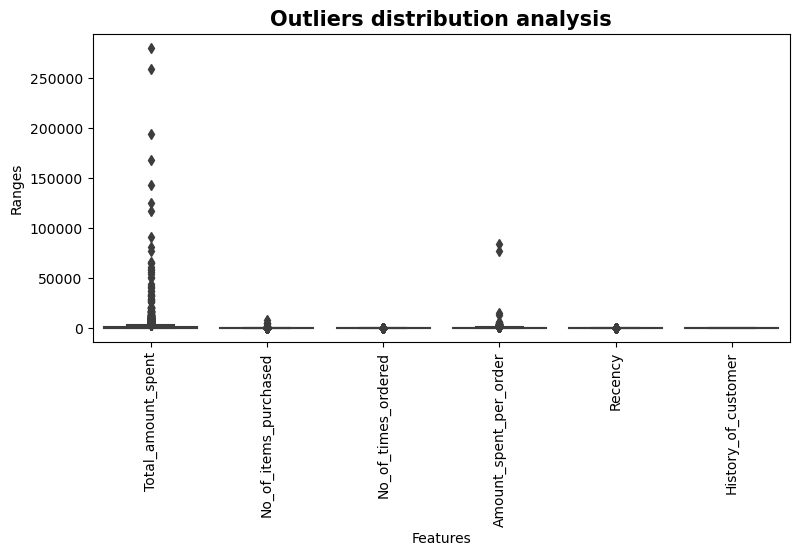

In [153]:
# Outlier analysis

plt.figure(figsize=(9,4))
sns.boxplot(data=cust_df.iloc[:,1:],orient='v')
plt.title('Outliers distribution analysis',fontsize=15,fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Ranges')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Outliers are present in all the features. Especially high in Amount column



In [274]:
# Treating the outliers

def outlier_treat(cust_df):
    for col in cust_df.iloc[:,1:].columns:
        q1=cust_df[col].quantile(0.25)
        q2=cust_df[col].quantile(0.5)
        q3=cust_df[col].quantile(0.75)
        IQR=q3-q1
        lower_bound=q1-(IQR*1.5)
        upper_bound=q3+(IQR*1.5)
        cust_df1=cust_df[(cust_df[col]>=lower_bound) & (cust_df[col]<=upper_bound)]
        return cust_df1

In [275]:
print(cust_df1.shape)
cust_df1.head()

(4339, 7)


,CustomerID,Total_amount_spent,No_of_items_purchased,No_of_times_ordered,Amount_spent_per_order,Recency,History_of_customer
0,12346,77183.60,1,1,77183.60,325,325
1,12347,4310.00,182,7,615.71,1,366
2,12348,1797.24,31,4,449.31,74,357
3,12349,1757.55,73,1,1757.55,18,18
4,12350,334.40,17,1,334.40,309,309


In [250]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
cust_scaled_df=ss.fit_transform(cust_df1.iloc[:,1:])

In [251]:
cust_scaled_df=pd.DataFrame(cust_scaled_df)
cust_scaled_df.columns=cust_df1.iloc[:,1:].columns

In [252]:
cust_scaled_df.head()

,Total_amount_spent,No_of_items_purchased,No_of_times_ordered,Amount_spent_per_order,Recency,History_of_customer
0,8.359634,-0.396512,-0.424675,42.739247,2.334858,0.871401
1,0.251046,0.394688,0.354080,0.109493,-0.905199,1.219147
2,-0.028546,-0.265374,-0.035297,0.016849,-0.175186,1.142813
3,-0.032963,-0.081781,-0.424675,0.745221,-0.735196,-1.732454
4,-0.191315,-0.326572,-0.424675,-0.047128,2.174855,0.735695


In [163]:
# Model Building

from sklearn.cluster import KMeans

km=KMeans(n_clusters=4)
km.fit(cust_scaled_df)

KMeans(n_clusters=4)

In [164]:
km.labels_

array([1, 3, 3, ..., 0, 3, 0])

In [165]:
set(km.labels_)

{0, 1, 2, 3}

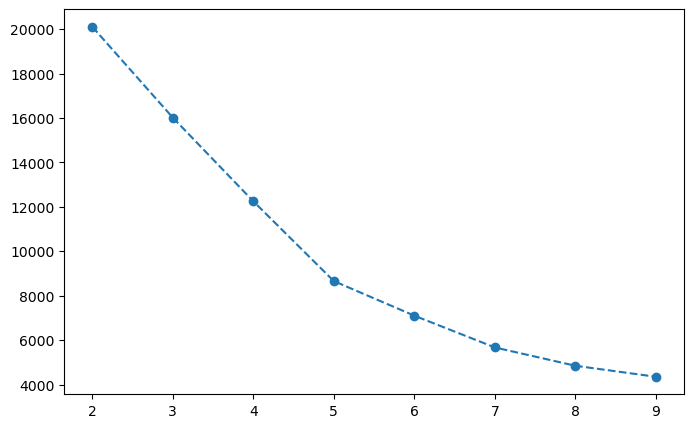

In [166]:
# Elbow curve to find the right number of clusters

temp=[]
n_cl=range(2,10)
for i in n_cl:
    km=KMeans(n_clusters=i)
    km.fit(cust_scaled_df)
    temp.append(km.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(2,10),temp,marker='o',linestyle='--')
plt.show()

In [ ]:
# n_cluster is selected to be 5

In [167]:
km=KMeans(n_clusters=5)
km.fit(cust_scaled_df)

KMeans(n_clusters=5)

In [168]:
cust_scaled_df['Cluster']=km.labels_

In [193]:
column=cust_scaled_df.iloc[:,:6].columns.tolist()

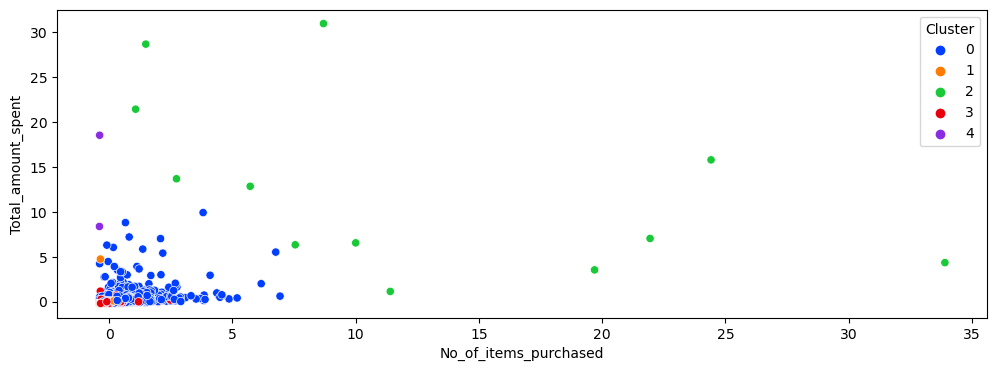

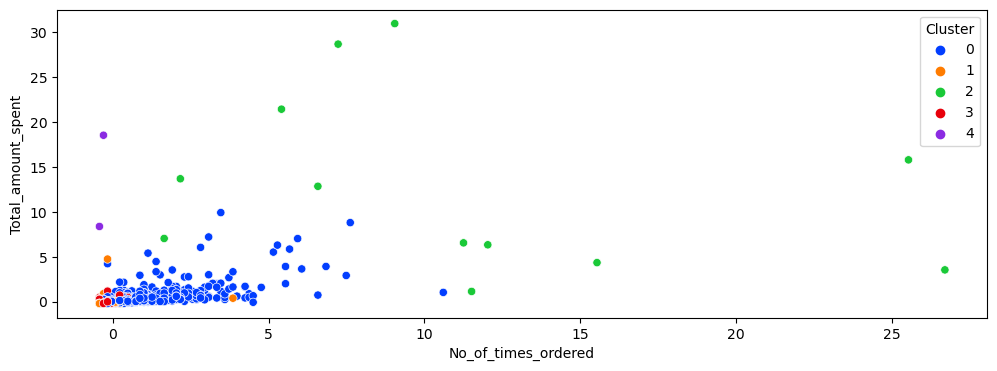

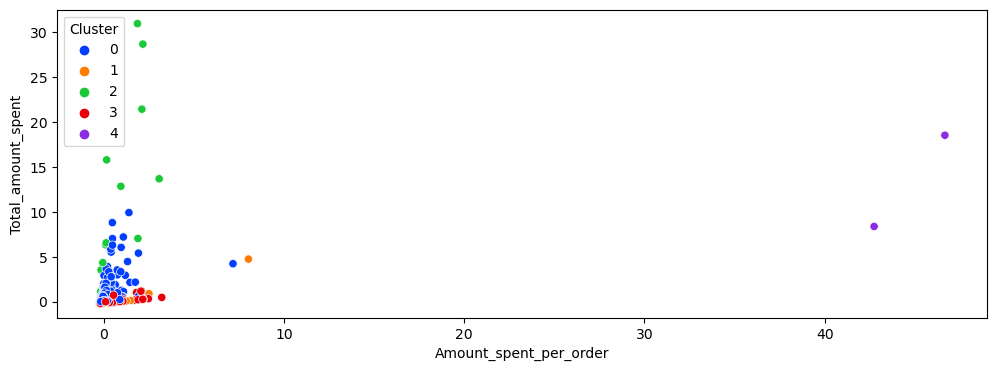

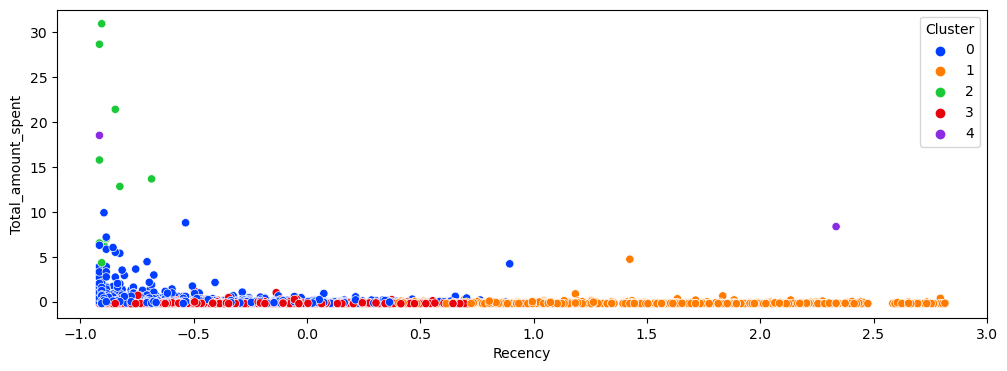

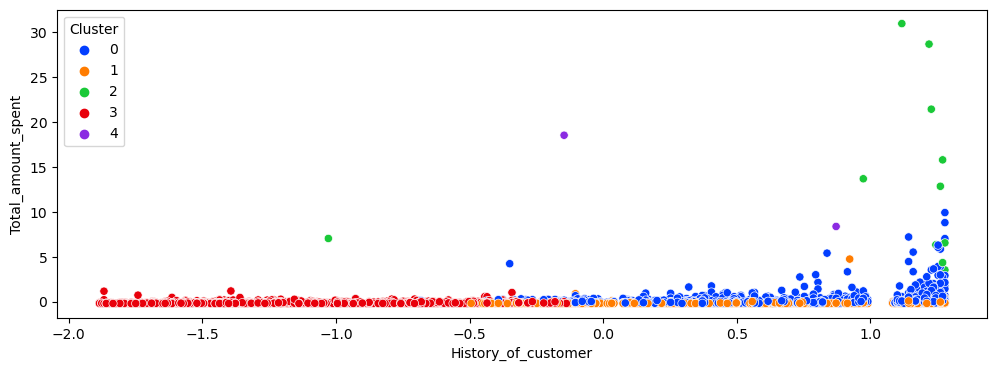

In [194]:
# Let us see variation between Total_amount_spent & other columnsas per the cluster seperation

for i in column[1:]:
    plt.figure(figsize=(12,4))
    sns.scatterplot(data=cust_scaled_df,x=i,y='Total_amount_spent',
                hue=cust_scaled_df['Cluster'],palette='bright')
    plt.show()

In [195]:
column

['Total_amount_spent',
 'No_of_items_purchased',
 'No_of_times_ordered',
 'Amount_spent_per_order',
 'Recency',
 'History_of_customer']

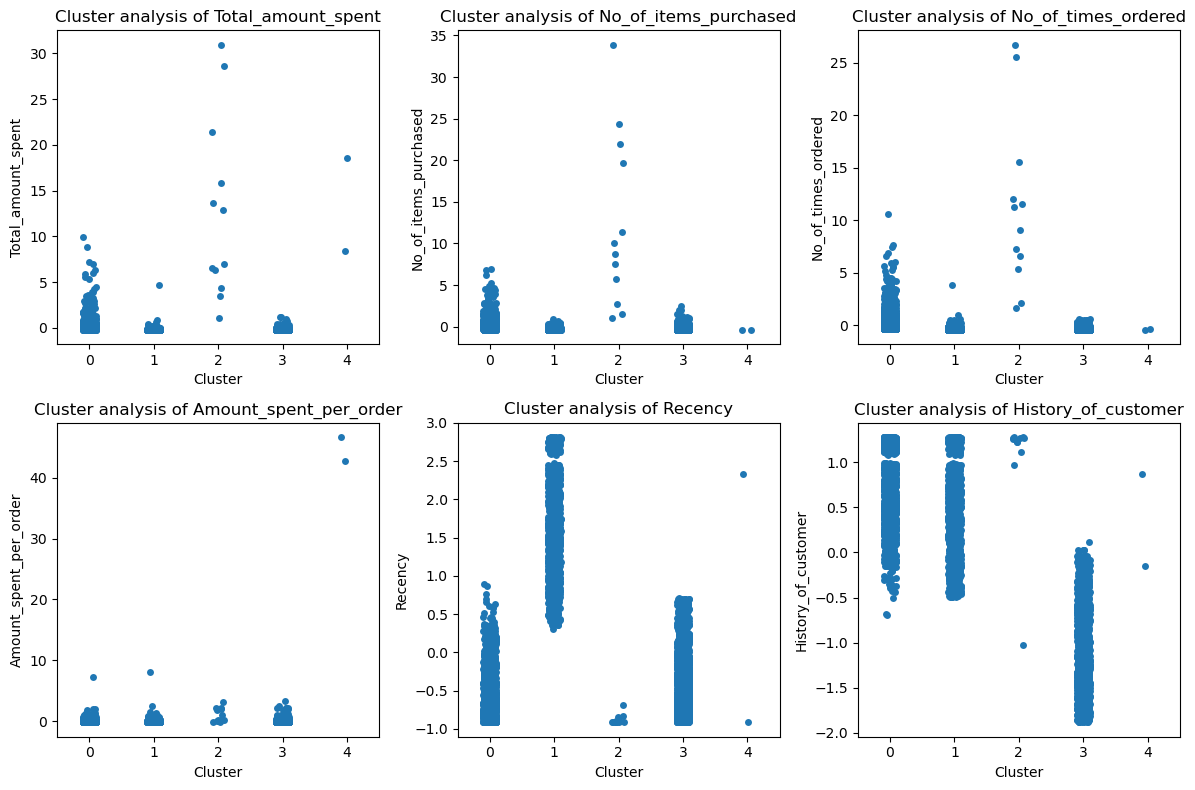

In [196]:
# Analysis of outputs based on the cluster

col_sets = [column[i:i+3] for i in range(0,len(column),3)]

fig, axes = plt.subplots(nrows=len(col_sets), ncols=3, figsize=(12, 4 * len(col_sets)))

for i, cols in enumerate(col_sets):
    for j, col in enumerate(cols):
        sns.stripplot(x='Cluster', y=col, data=cust_scaled_df, ax=axes[i,j])
        axes[i,j].set_title(f'Cluster analysis of {col}')

plt.tight_layout()
plt.show()

In [199]:
col_sets
print(range(0, len(column), 3))
column

range(0, 6, 3)


['Total_amount_spent',
 'No_of_items_purchased',
 'No_of_times_ordered',
 'Amount_spent_per_order',
 'Recency',
 'History_of_customer']

In [253]:
# DBSCAN algorithm

from sklearn.cluster import DBSCAN
dbscan_def=DBSCAN()


In [254]:
dbscan_def.fit(cust_scaled_df)

DBSCAN()

In [255]:
cust_scaled_df['Cluster_dbs']=dbscan.labels_

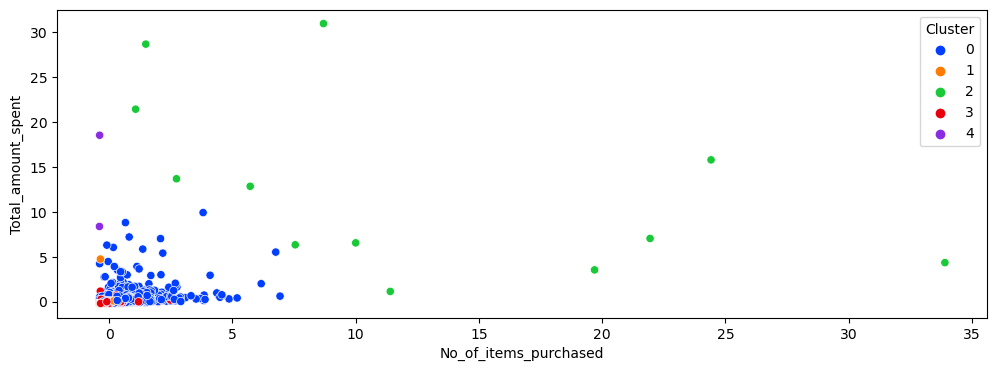

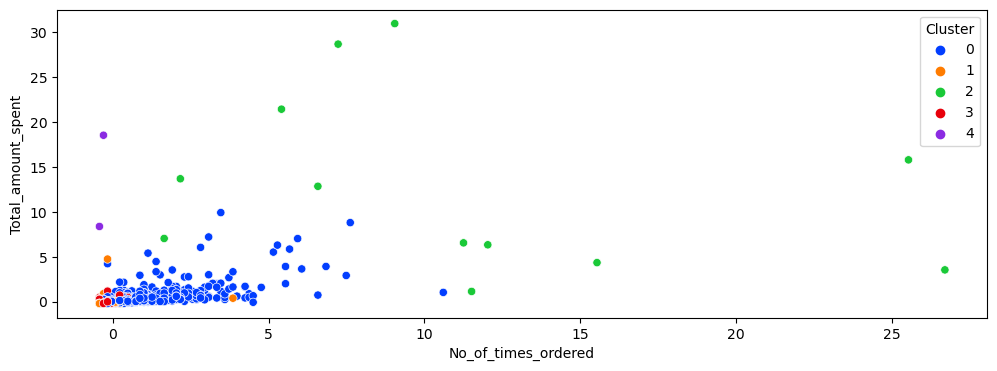

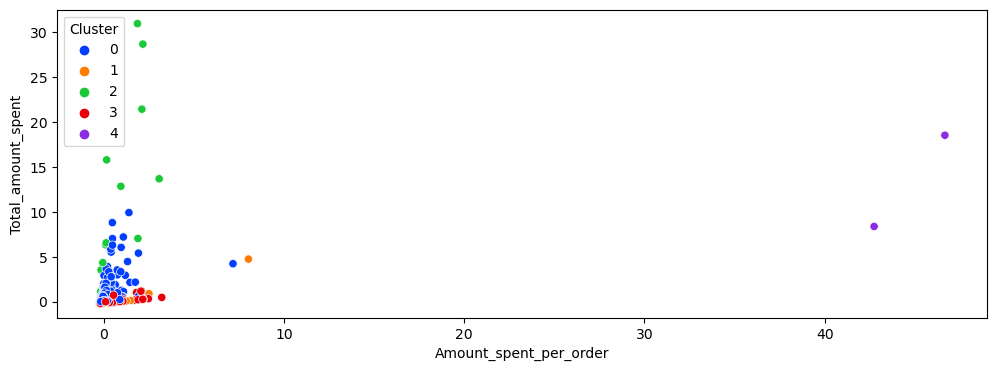

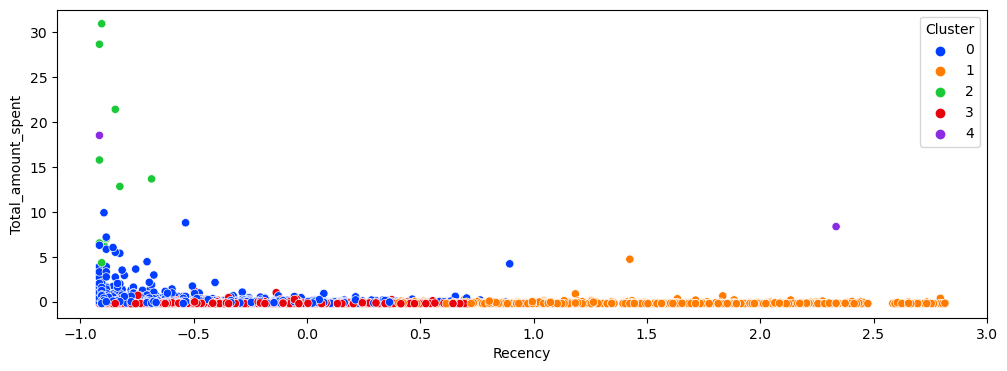

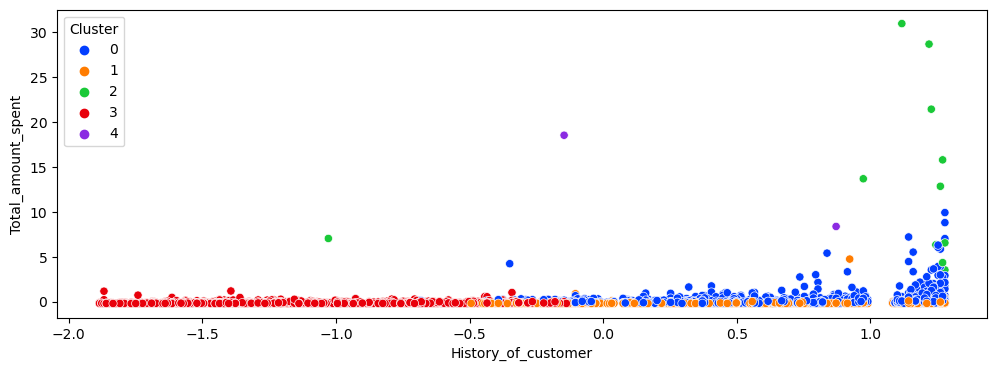

In [209]:
# Let us see variation between Total_amount_spent & other columnsas per the cluster seperation

for i in column[1:]:
    plt.figure(figsize=(12,4))
    sns.scatterplot(data=cust_scaled_df,x=i,y='Total_amount_spent',
                hue=cust_scaled_df['Cluster'],palette='bright')
    plt.show()

In [ ]:
# Let us find the better epsilon , minimum samples 

In [224]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(cust_scaled_df)
dist, indices = nbrs.kneighbors(cust_scaled_df)


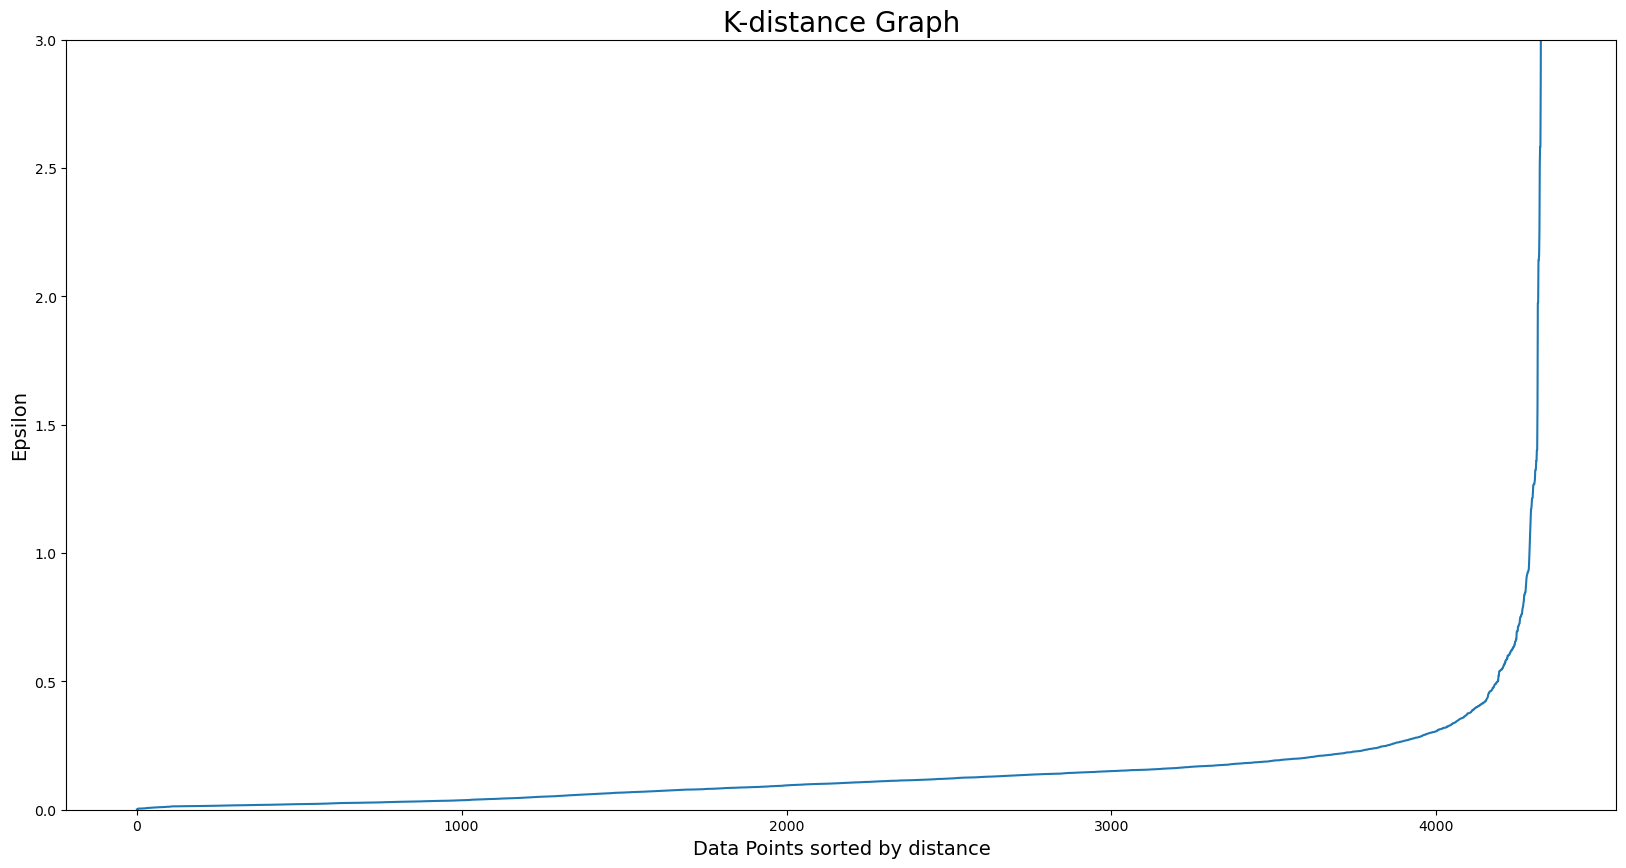

In [226]:
# Plotting K-distance Graph

distances = np.sort(dist, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.ylim([0.0,3.0])
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [234]:

min_samples = range(10,21)
eps = np.arange(0.2,0.45,0.01)

In [235]:
# Finding better minimum samples, epsilon, silhouette_score

from sklearn.metrics import silhouette_score

output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms,eps = ep).fit(cust_scaled_df).labels_
        score = silhouette_score(cust_scaled_df, labels)
        output.append((ms, ep, score))


In [236]:
# Result of the above findings

min_samples,eps,score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")


Best silhouette_score: 0.6156229048888097
min_samples: 12
eps: 0.4400000000000002


In [263]:
# Applying DBSCAN with choosen values

from collections import Counter

dbscan = DBSCAN(min_samples=min_samples, eps = 0.44).fit(cust_scaled_df)
labels = dbscan.labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(cust_scaled_df, labels)}")


Number of clusters: 4
Number of outliers: 425
Silhouette_score: 0.528465625349556


In [264]:
cust_scaled_df['Cluster']=labels

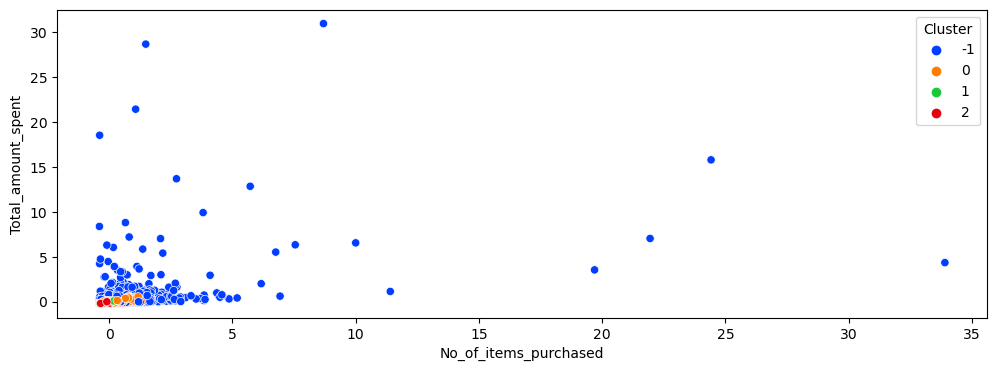

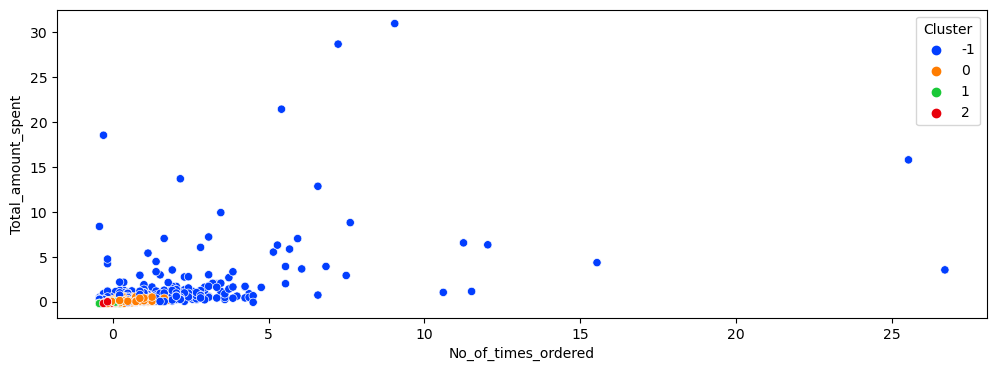

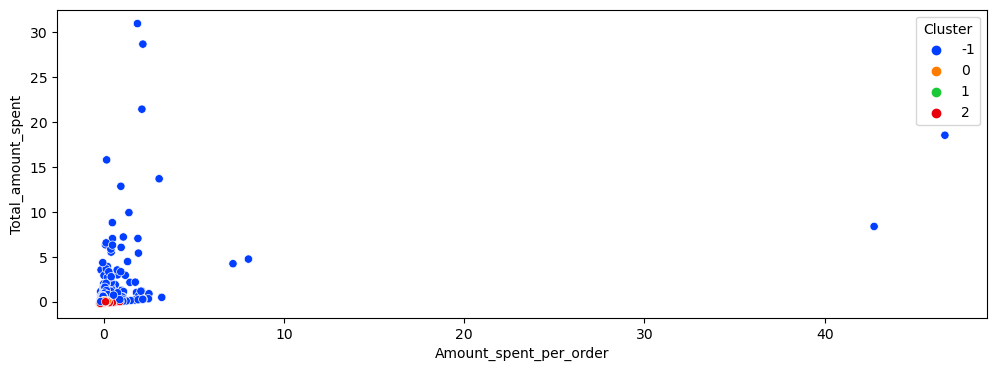

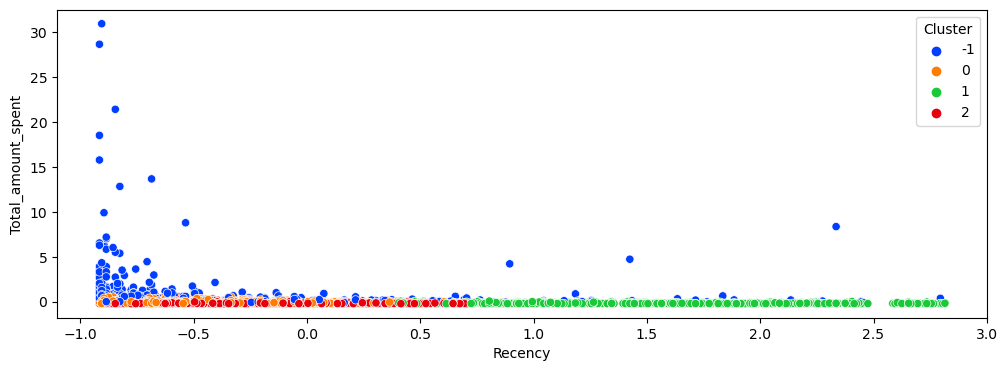

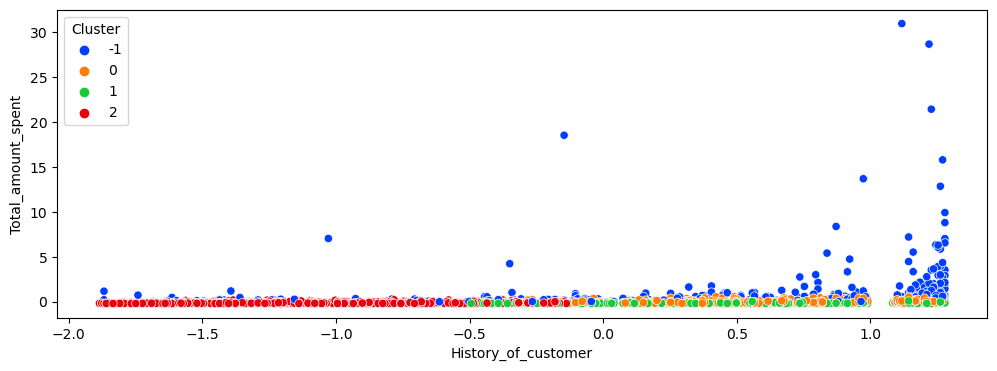

In [265]:
# Let us see variation between Total_amount_spent & other columnsas per the cluster seperation

for i in column[1:]:
    plt.figure(figsize=(12,4))
    sns.scatterplot(data=cust_scaled_df,x=i,y='Total_amount_spent',
                hue=cust_scaled_df['Cluster'],palette='bright')
    plt.show()

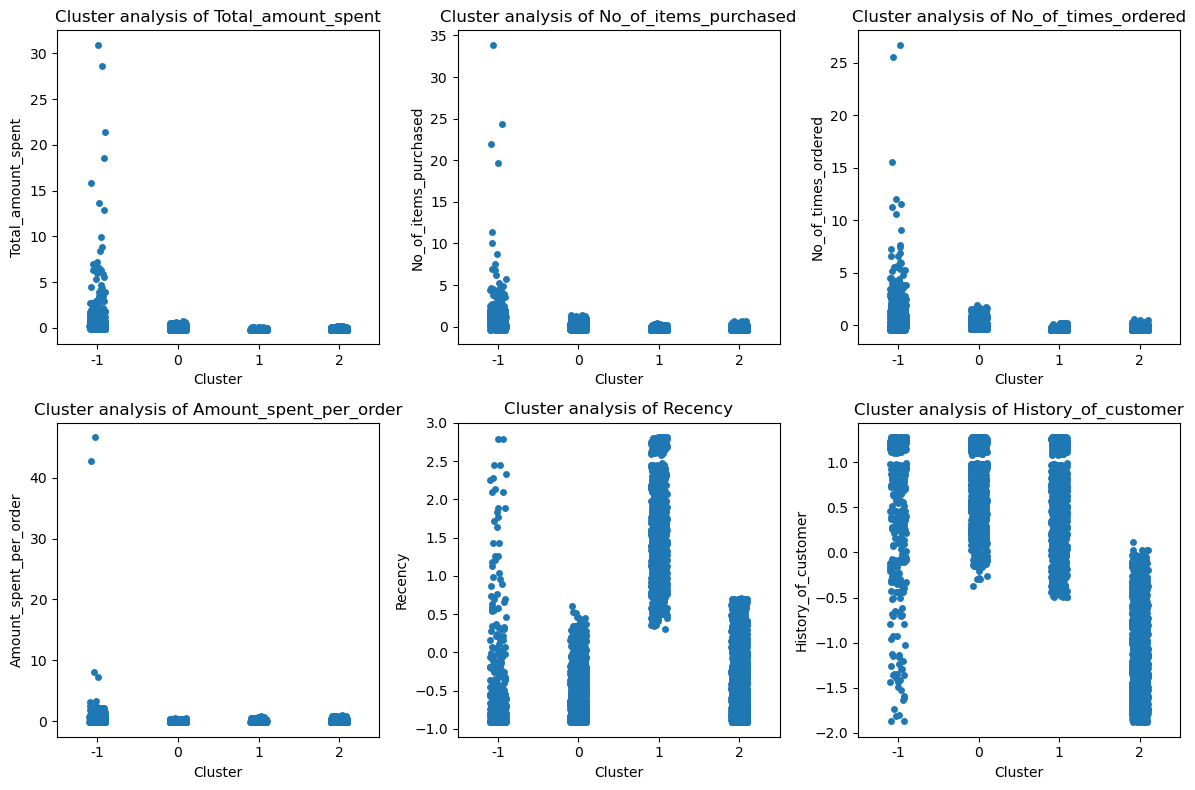

In [266]:
# Analysis of outputs based on the cluster

col_sets = [column[i:i+3] for i in range(0,len(column),3)]

fig, axes = plt.subplots(nrows=len(col_sets), ncols=3, figsize=(12, 4 * len(col_sets)))

for i, cols in enumerate(col_sets):
    for j, col in enumerate(cols):
        sns.stripplot(x='Cluster', y=col, data=cust_scaled_df, ax=axes[i,j])
        axes[i,j].set_title(f'Cluster analysis of {col}')
plt.tight_layout()
plt.show()

In [267]:
import joblib

file='customer_segmentation.pkl'
joblib.dump(dbscan,file)

['customer_segmentation.pkl']